In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

In [3]:
"""
-date time year-month-day hour:minute:second
-Appliances, energy use in Wh
-lights, energy use of light fixtures in the house in Wh
-T1, Temperature in kitchen area, in Celsius
-RH1, Humidity in kitchen area, in % 
- T2, Temperature in living room area, in Celsius 
- RH2, Humidity in living room area, in %
-T3, Temperature in laundry room area
-RH3, Humidity in laundry room area, in % 
- T4, Temperature in office room, in Celsius 
- RH4, Humidity in office room, in %
-T5, Temperature in bathroom, in Celsius
-RH5, Humidity in bathroom, in % 
- T6, Temperature outside the building (north side), in Celsius 
- RH6, Humidity outside the building (north side), in %
-T7, Temperature in ironing room , in Celsius
-RH7, Humidity in ironing room, in % 
- T8, Temperature in teenager room 2, in Celsius 
- RH8, Humidity in teenager room 2, in %
-T9, Temperature in parents room, in Celsius
-RH9, Humidity in parents room, in % 
To, Temperature outside (from Chievres weather station), 
- Press_mm_hg in Celsius Pressure (from Chievres weather station), in mm Hg 
- RHout, Humidity outside (from Chievres weather station), in %
-Wind speed (from Chievres weather station), in m/s
-Visibility (from Chievres weather station), in km
-Tdewpoint (from Chievres weather station), Â°C
-rv1, Random variable 1, nondimensional
-rv2, Random variable 2, nondimensional

Where indicated, hourly data (then interpolated) from the nearest airport weather station 
(Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis, rp5.ru. 
Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of weather data.
"""

'\n-date time year-month-day hour:minute:second\n-Appliances, energy use in Wh\n-lights, energy use of light fixtures in the house in Wh\n-T1, Temperature in kitchen area, in Celsius\n-RH1, Humidity in kitchen area, in % T2, Temperature in living room area, in Celsius RH2, \nHumidity in living room area, in %\n-T3, Temperature in laundry room area\n-RH3, Humidity in laundry room area, in % T4, Temperature in office room, in Celsius RH4, \nHumidity in office room, in %\n-T5, Temperature in bathroom, in Celsius\n-RH5, Humidity in bathroom, in % T6, Temperature outside the building (north side), in Celsius RH6, \nHumidity outside the building (north side), in %\n-T7, Temperature in ironing room , in Celsius\n-RH7, Humidity in ironing room, in % T8, Temperature in teenager room 2, in Celsius RH8, \nHumidity in teenager room 2, in %\n-T9, Temperature in parents room, in Celsius\n-RH9, Humidity in parents room, in % To, Temperature outside (from Chievres weather station), \nin Celsius Pressu

In [2]:
# Importar o dataset de treino e teste
train = pd.read_csv("projeto8-training.csv", parse_dates=["date"])
test = pd.read_csv("projeto8-testing.csv")

In [3]:
train.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,61200,Weekday,Monday
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,61800,Weekday,Monday
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,62400,Weekday,Monday
3,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,63600,Weekday,Monday
4,2016-01-11 17:50:00,50,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,...,734.0,92.0,5.333333,43.833333,4.8,44.919484,44.919484,64200,Weekday,Monday


In [4]:
# Obter os nomes das colunas
train.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM', 'WeekStatus',
       'Day_of_week'],
      dtype='object')

In [5]:
# Observar os tipos de dados e se existem dados nulos
"""
- Existem 29 colunas sendo: 1 com data, 2 com números inteiros e 26 com float
- Lights parece ser categórica
- Não existem valores nuos
- A variável dependente (target) é a Aplliances
"""
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14803 entries, 0 to 14802
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         14803 non-null  datetime64[ns]
 1   Appliances   14803 non-null  int64         
 2   lights       14803 non-null  int64         
 3   T1           14803 non-null  float64       
 4   RH_1         14803 non-null  float64       
 5   T2           14803 non-null  float64       
 6   RH_2         14803 non-null  float64       
 7   T3           14803 non-null  float64       
 8   RH_3         14803 non-null  float64       
 9   T4           14803 non-null  float64       
 10  RH_4         14803 non-null  float64       
 11  T5           14803 non-null  float64       
 12  RH_5         14803 non-null  float64       
 13  T6           14803 non-null  float64       
 14  RH_6         14803 non-null  float64       
 15  T7           14803 non-null  float64       
 16  RH_7

In [6]:
# Quantas linhas e colunas cada dataset apresenta
train.shape, test.shape

((14803, 32), (4932, 32))

In [7]:
# Observar se existem dados NA no dataset de treino
train.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
NSM            0
WeekStatus     0
Day_of_week    0
dtype: int64

In [8]:
# Observar se existem dados NA no dataset de teste
test.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
NSM            0
WeekStatus     0
Day_of_week    0
dtype: int64

In [9]:
# Lista de colunas por tipo para análise mais eficiente
col_date = ["date", "WeekStatus", "Day_of_week"]

col_temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]

col_hum = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]

col_weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg",
                "Windspeed","Visibility"]

col_light = ["lights"]

col_randoms = ["rv1", "rv2", "NSM"]

col_target = ["Appliances"]

vars = col_date + col_temp + col_hum + col_weather + col_randoms + col_light

<AxesSubplot:xlabel='Appliances', ylabel='Count'>

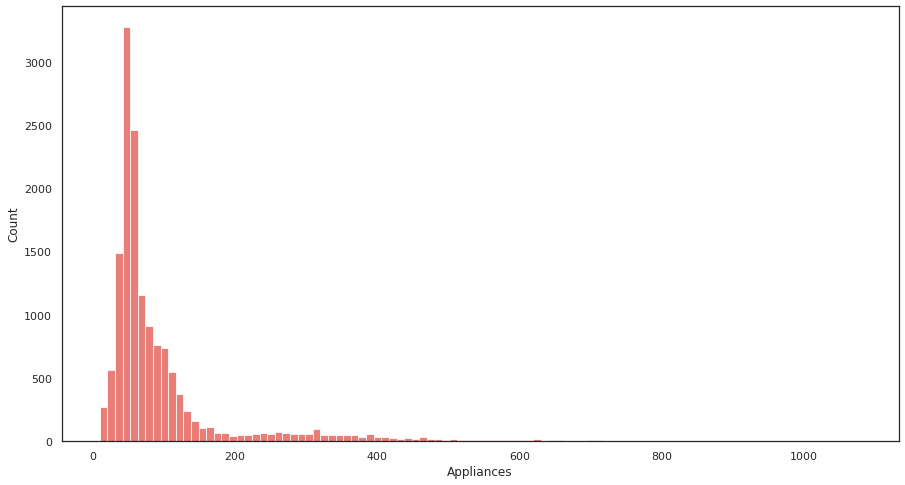

In [11]:
# Avaliar a variável dependente (target)
""" A Maioria do consumo está com menos de 200 Wh"""
plt.figure(figsize=(15,8))
sns.set_theme(style="white", palette=sns.color_palette("Spectral"))
sns.histplot(data=train, x="Appliances", bins=100)

<AxesSubplot:xlabel='Appliances'>

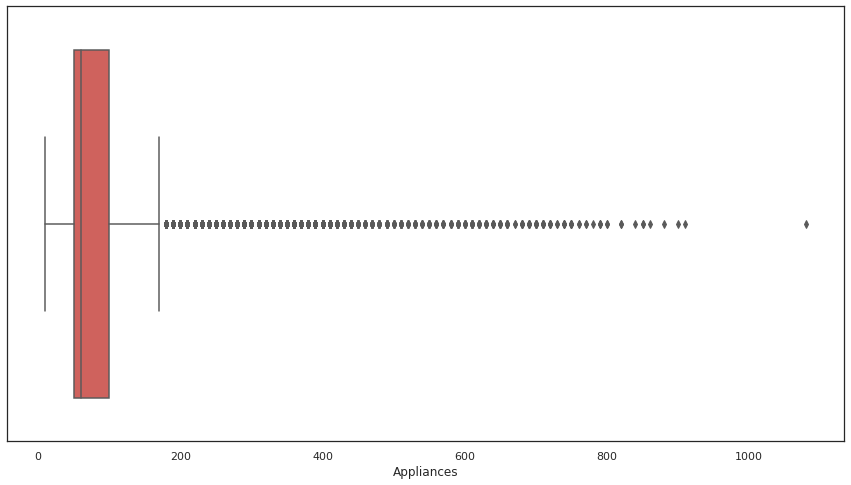

In [12]:
# Avaliar a variável dependente (target)
""" Existem outliers nestes dados"""
plt.figure(figsize=(15,8))
sns.set_theme(style="white", palette=sns.color_palette("Spectral"))
sns.boxplot(data=train, x="Appliances")

<AxesSubplot:xlabel='date', ylabel='Appliances'>

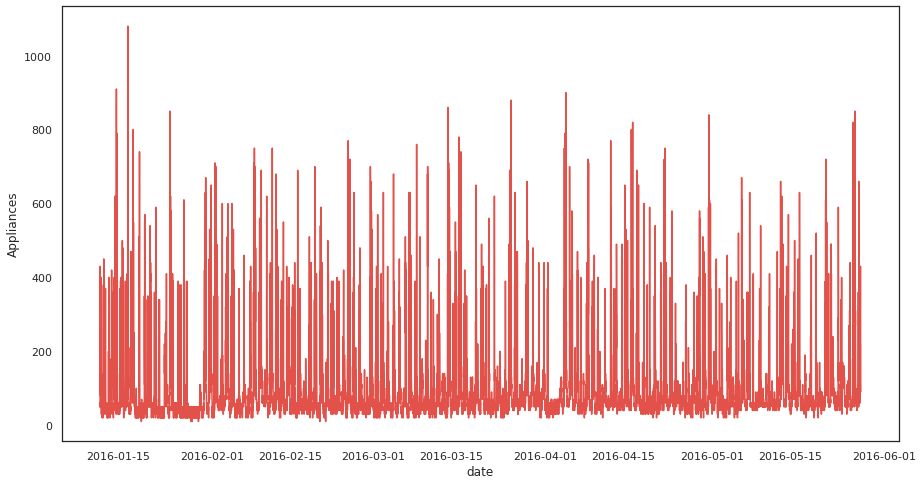

In [13]:
# Avaliar a variável dependente (target) de acordo com o tempo (times series)
plt.figure(figsize=(15,8))
sns.set_theme(style="white", palette=sns.color_palette("Spectral"))
sns.lineplot(data=train, x="date", y="Appliances")

/home/leandro/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Appliances', ylabel='Density'>

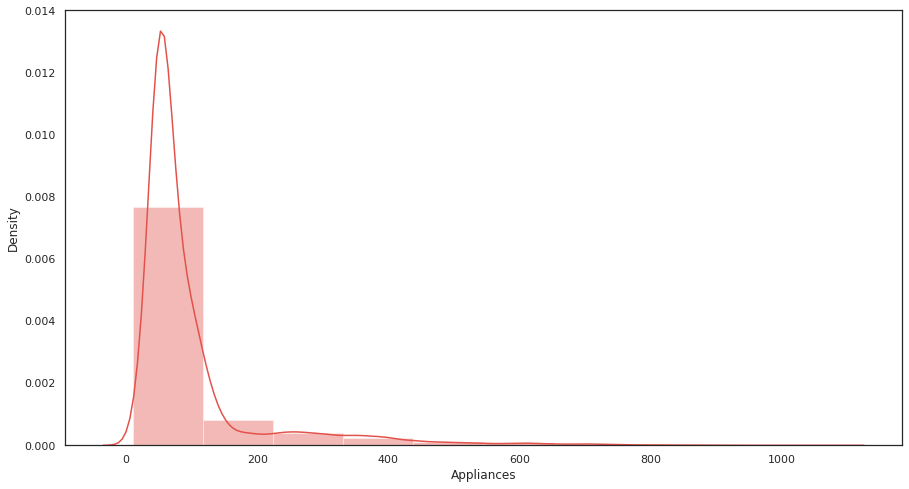

In [14]:
# Avaliar a variável dependente (target) com frequência
plt.figure(figsize=(15,8))
sns.set_theme(style="white", palette=sns.color_palette("Spectral"))
sns.distplot(train["Appliances"], bins = 10)

<AxesSubplot:xlabel='Appliances'>

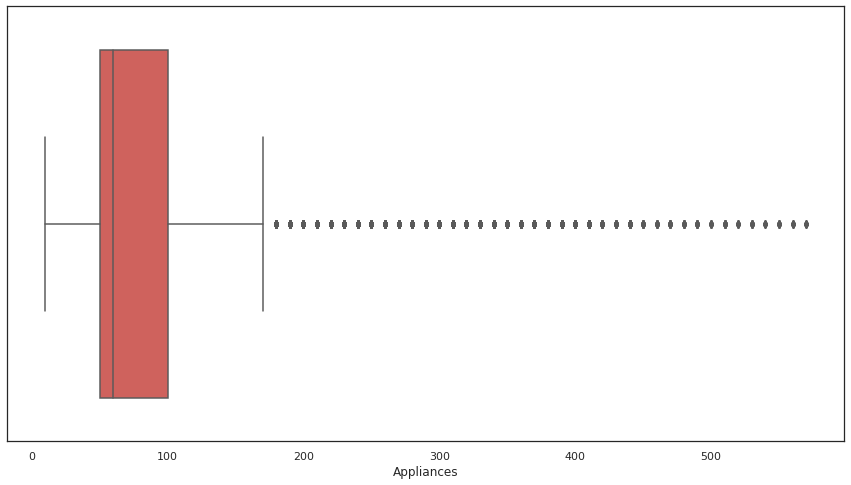

In [15]:
# Excluir outliers que foram observados e plotar gráfico
train = train[train['Appliances'].between(train['Appliances'].quantile(.0), 
    train['Appliances'].quantile(.99))]
plt.figure(figsize=(15,8))
sns.set_theme(style="white", palette=sns.color_palette("Spectral"))
sns.boxplot(data=train, x="Appliances")

In [16]:
# Observar as variáveis integer e float
train.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM
count,14657.000000,14657.000000,14657.000000,14657.000000,14657.000000,14657.000000,14657.000000,14657.000000,14657.000000,14657.000000,...,14657.000000,14657.000000,14657.000000,14657.000000,14657.000000,14657.000000,14657.000000,14657.000000,14657.000000,14657.000000
mean,92.267176,3.759978,21.684674,40.256809,20.337144,40.424073,22.258727,39.243198,20.854717,39.025216,...,41.537767,7.400765,755.504027,79.790729,4.027433,38.330917,3.755316,25.089468,25.089468,42905.833390
std,85.240541,7.905209,1.608898,3.975318,2.191167,4.066616,2.011715,3.248403,2.046666,4.336896,...,4.153657,5.324035,7.426144,14.951933,2.436155,11.834927,4.199239,14.483140,14.483140,25043.672977
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.893333,17.200000,28.766667,15.100000,27.660000,...,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322,0.000000
25%,50.000000,0.000000,20.730000,37.333333,18.790000,37.900000,20.790000,36.900000,19.500000,35.530000,...,38.500000,3.633333,750.883333,70.333333,2.000000,29.000000,0.900000,12.588211,12.588211,21000.000000
50%,60.000000,0.000000,21.600000,39.626667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,40.856000,6.900000,756.100000,84.000000,3.666667,40.000000,3.450000,25.048188,25.048188,43200.000000
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.290000,23.290000,41.760000,22.100000,42.126667,...,44.360000,10.400000,760.950000,91.666667,5.500000,40.000000,6.500000,37.686157,37.686157,64800.000000
max,570.000000,50.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.063333,...,53.326667,25.966667,772.300000,100.000000,13.500000,66.000000,15.500000,49.996530,49.996530,85800.000000


<AxesSubplot:xlabel='lights', ylabel='Count'>

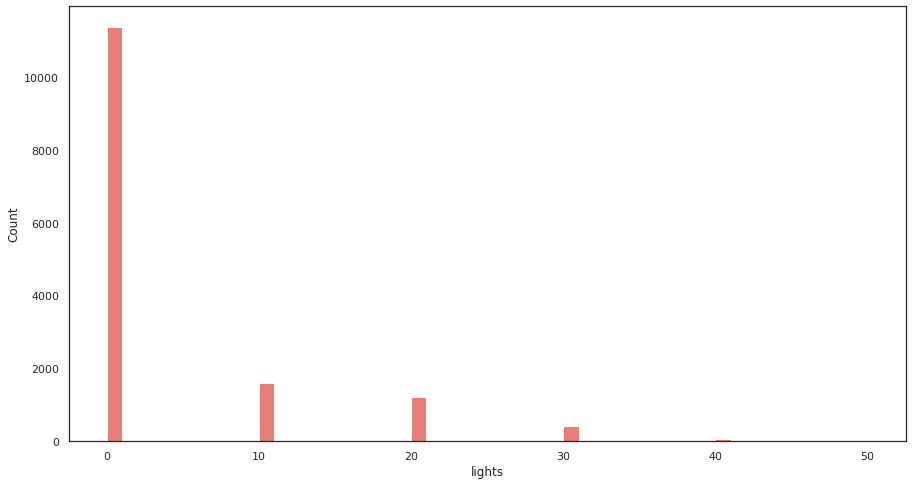

In [17]:
# Avaliar a variável lights
""" Parece ser uma variável categórica, muita energia é 0 e existem poucos valores"""
plt.figure(figsize=(15,8))
sns.set_theme(style="white", palette=sns.color_palette("Spectral"))
sns.histplot(data=train, x="lights", bins=50)

In [18]:
# Avaliar a quantidade por valor da variável lights
"""Confirmamos que existem muito valores 0, que é a maioria"""
train.lights.value_counts()

0     11379
10     1592
20     1211
30      411
40       56
50        8
Name: lights, dtype: int64

In [19]:
# Avaliar as temperaturas com max e min
"""
- A menor temperatura foi -6 e a maior 29.8
- Apenas T6 ficou fora da média
"""
train[col_temp].agg(["min", "max", "mean"])

,T1,T2,T3,T4,T5,T6,T7,T8,T9
min,16.790000,16.100000,17.200000,15.100000,15.330000,-6.065000,15.390000,16.306667,14.890000
max,26.260000,29.856667,29.236000,26.200000,25.745000,28.290000,26.000000,27.230000,24.500000
mean,21.684674,20.337144,22.258727,20.854717,19.587118,7.903064,20.264369,22.030813,19.481958


In [20]:
# Avaliar a humidade com max e min
"""
- A menor temperatura foi 20 e a maior 63 exceto RH5 e 6
- RH5 e RH6 ficaram fora da média
"""
train[col_hum].agg(["min", "max", "mean"])

,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9
min,27.023333,20.893333,28.766667,27.660000,29.856667,1.000000,23.200000,29.600000,29.166667
max,63.360000,56.026667,50.163333,51.063333,95.953889,99.900000,51.400000,58.780000,53.326667
mean,40.256809,40.424073,39.243198,39.025216,50.970742,54.673255,35.390071,42.929875,41.537767


In [21]:
train.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM', 'WeekStatus',
       'Day_of_week'],
      dtype='object')

In [22]:
# Avaliar se o número de eventos que foram em dia de semana ou no final de semana
""" Maioria durante a semana """
train["WeekStatus"].value_counts()

Weekday    10611
Weekend     4046
Name: WeekStatus, dtype: int64

In [23]:
# Avaliar o número de eventos por dias da semana
""" Bem balanceado entre os grupos """
train["Day_of_week"].value_counts()

Wednesday    2163
Tuesday      2146
Friday       2127
Thursday     2110
Monday       2065
Sunday       2048
Saturday     1998
Name: Day_of_week, dtype: int64

<AxesSubplot:xlabel='date', ylabel='Appliances'>

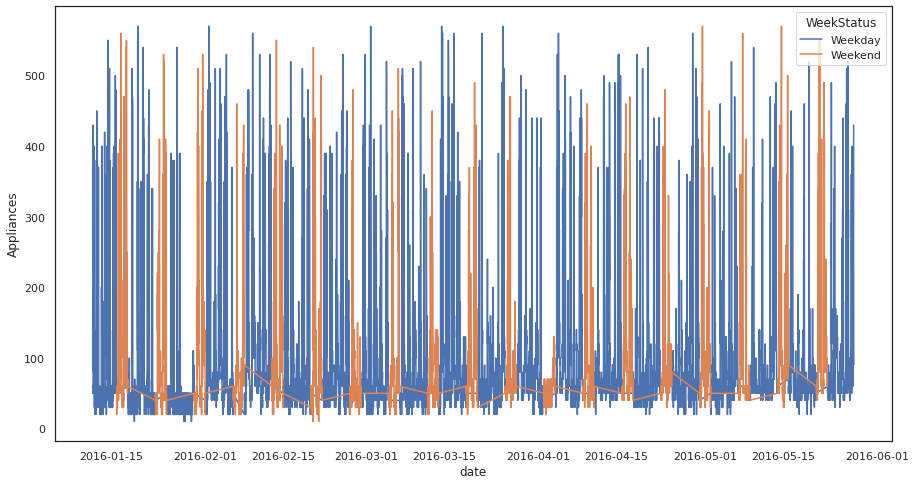

In [24]:
# Avaliar a variável dependente por dia de semana ou final de semana
""" Parece ser uma variável categórica, muita energia é 0 e existem poucos valores"""
plt.figure(figsize=(15,8))
sns.set_theme(style="white")
sns.lineplot(data=train, x="date", y="Appliances", hue="WeekStatus")

array([[<AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'T1'}>,
        <AxesSubplot:title={'center':'T2'}>,
        <AxesSubplot:title={'center':'T3'}>,
        <AxesSubplot:title={'center':'T4'}>],
       [<AxesSubplot:title={'center':'T5'}>,
        <AxesSubplot:title={'center':'T6'}>,
        <AxesSubplot:title={'center':'T7'}>,
        <AxesSubplot:title={'center':'T8'}>,
        <AxesSubplot:title={'center':'T9'}>],
       [<AxesSubplot:title={'center':'RH_1'}>,
        <AxesSubplot:title={'center':'RH_2'}>,
        <AxesSubplot:title={'center':'RH_3'}>,
        <AxesSubplot:title={'center':'RH_4'}>,
        <AxesSubplot:title={'center':'RH_5'}>],
       [<AxesSubplot:title={'center':'RH_6'}>,
        <AxesSubplot:title={'center':'RH_7'}>,
        <AxesSubplot:title={'center':'RH_8'}>,
        <AxesSubplot:title={'center':'RH_9'}>,
        <AxesSubplot:title={'center':'T_out'}>],
       [<AxesSubplot:title={'center':'Tdewpoint'}>,
        <AxesSubplot:

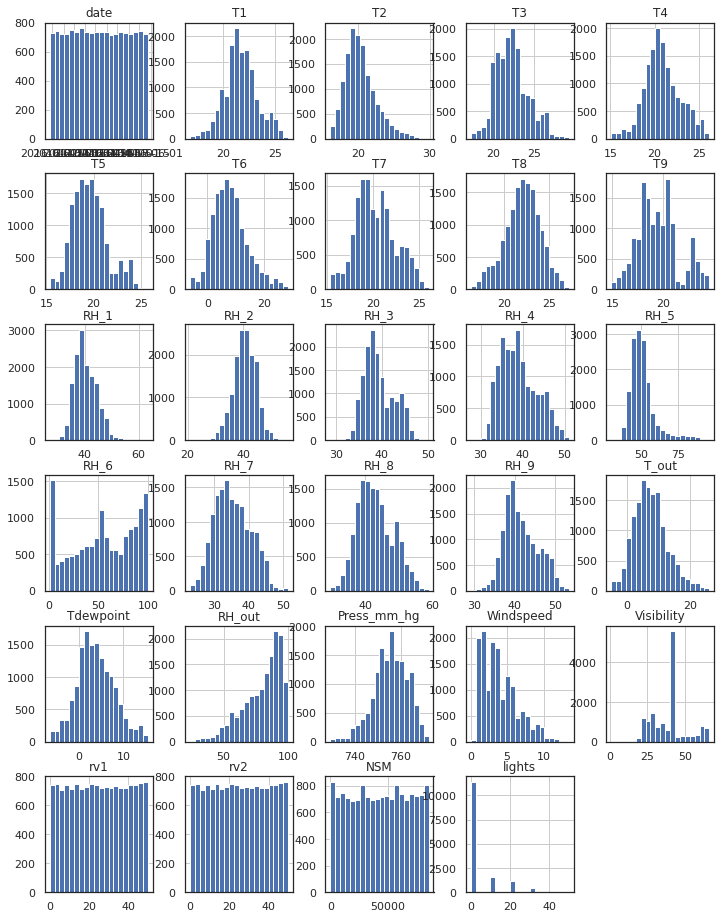

In [25]:
# Visualizar as distruibuição dos dados nas variáveis independentes
""" 
- As variáveis RH6, RH_out, Visibility e Windspeed apresentam distribuição irregulares
- AS T sugrem ser distribuição normal (exceto a T9)
- AS RH também sugerem distribuição normla (exceo RH_6 e out)
"""
train[vars].hist(bins=20, figsize=(12, 16))

/home/leandro/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/leandro/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/leandro/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

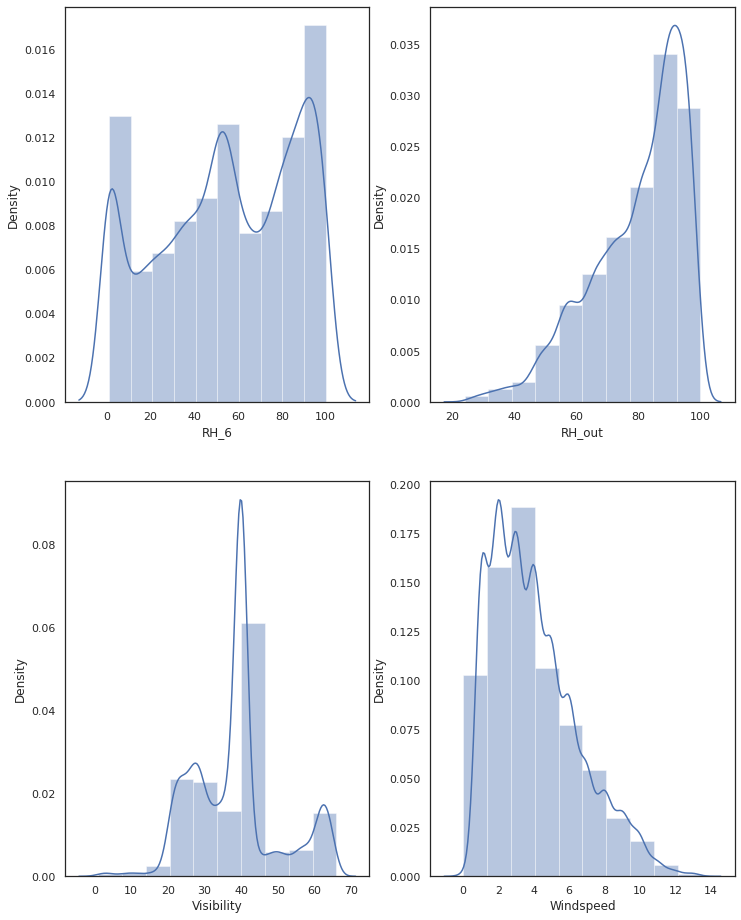

In [26]:
# Avaliar a variável com distruibuições irregulares com distplot
f, ax = plt.subplots(2,2, figsize=(12,16))
sns.set_theme(style="white", palette=sns.color_palette("Spectral"))
vis1 = sns.distplot(train["RH_6"],bins=10, ax= ax[0][0])
vis2 = sns.distplot(train["RH_out"],bins=10, ax=ax[0][1])
vis3 = sns.distplot(train["Visibility"],bins=10, ax=ax[1][0])
vis4 = sns.distplot(train["Windspeed"],bins=10, ax=ax[1][1])

In [27]:
# Separar o dataset em dependente e independente
def separa_df(df, target):
    y = df[target].copy()
    X = df.drop(target, axis=1)
    return X, y

In [28]:
# Obter o dataset com variásveis independentes e o target
X, y = separa_df(train, "Appliances")

In [29]:
# Transformar as variáveis categóricas em numéricas para a correlação
def encod_var(df, var, df2):
    x = LabelEncoder().fit_transform(df[var])
    df2[var] = x

In [30]:
encod_var(train, "WeekStatus", X)
encod_var(train, "Day_of_week", X)
X

,date,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,2016-01-11 17:00:00,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,61200,0,1
1,2016-01-11 17:10:00,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,61800,0,1
2,2016-01-11 17:20:00,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,62400,0,1
3,2016-01-11 17:40:00,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,63600,0,1
4,2016-01-11 17:50:00,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,45.730000,...,734.0,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484,64200,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14798,2016-05-27 17:00:00,0,25.600000,47.193333,25.968571,42.528571,27.390000,41.030000,24.700000,45.626667,...,755.2,55.000000,3.000000,22.000000,13.400000,18.248201,18.248201,61200,0,0
14799,2016-05-27 17:10:00,0,25.533333,46.860000,25.978000,42.534000,27.323333,41.090000,24.700000,45.626667,...,755.2,55.333333,3.166667,22.833333,13.366667,16.966162,16.966162,61800,0,0
14800,2016-05-27 17:30:00,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940,63000,0,0
14801,2016-05-27 17:50:00,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,...,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784,64200,0,0


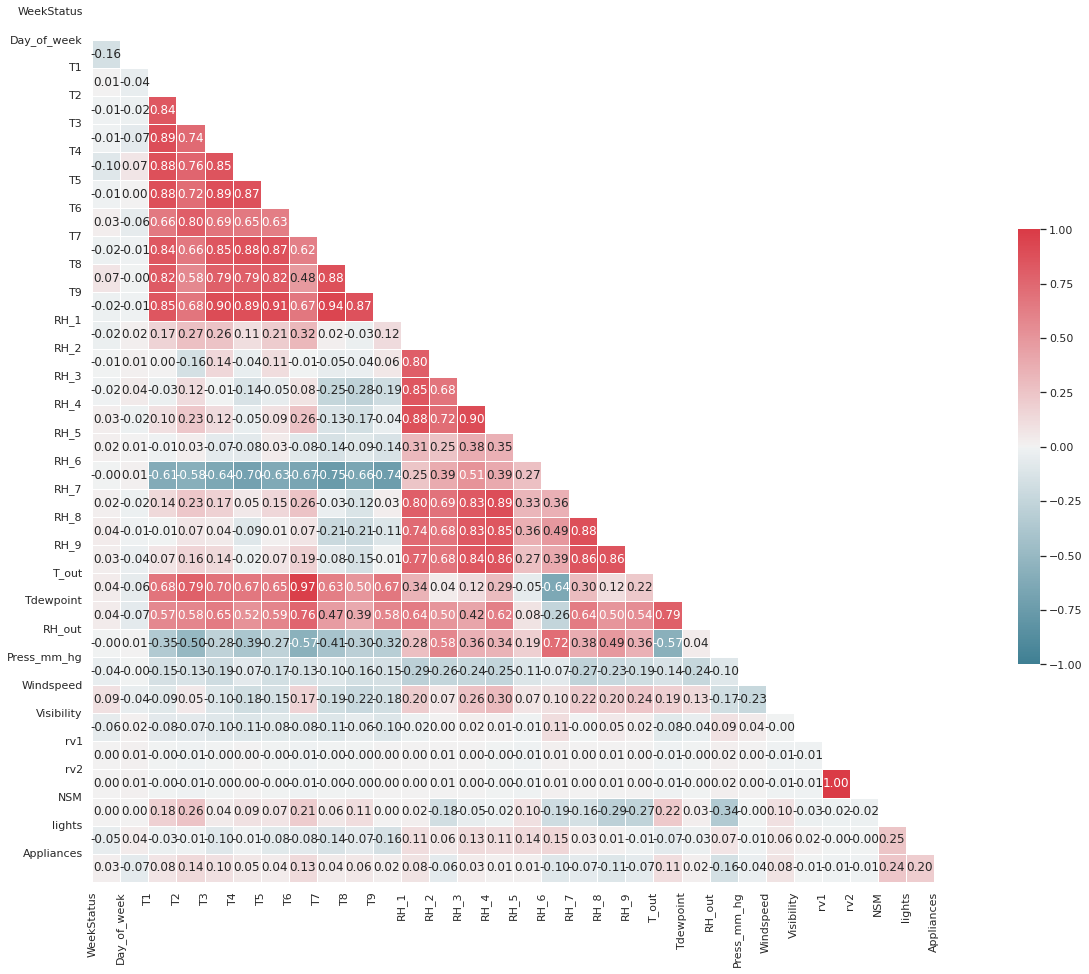

In [31]:
# Correlação das variáveis
X["Appliances"] = y
train_corr = X[vars + col_target]
corr = train_corr.corr()
# Mask the repeated values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.set_theme(style="white")
cmap = sns.diverging_palette(220, 10, as_cmap=True)  
f, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(corr, annot=True, fmt=".2f" , mask=mask, cmap=cmap, vmax=1, vmin=-1,
    square=True, linewidths=.5, cbar_kws={"shrink": .5})
    #Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
plt.show()

In [32]:
# Funções para ter as principais correlações
""" Sugere que pode ter multicolinearidade """
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(corr, 40))

Top Absolute Correlations
rv1   rv2      1.000000
T6    T_out    0.999059
T7    T9       0.994942
T3    T5       0.994076
T5    T9       0.992579
T4    T7       0.992070
T1    T5       0.992014
T4    T9       0.990916
T7    T8       0.990359
T1    T4       0.990040
      T3       0.989808
RH_7  RH_9     0.988526
T3    T9       0.988148
T4    T5       0.987499
RH_4  RH_7     0.986502
T1    T9       0.985515
RH_8  RH_9     0.982985
T5    T7       0.982763
T1    T7       0.981798
T8    T9       0.981394
RH_4  RH_9     0.980689
T3    T4       0.979861
RH_3  RH_4     0.977929
T4    T8       0.976036
RH_3  RH_8     0.975111
T3    T7       0.973595
RH_1  RH_4     0.972535
T2    T6       0.971669
RH_7  RH_8     0.971463
RH_1  RH_7     0.970612
T2    T_out    0.969655
RH_4  RH_8     0.969097
T5    T8       0.967745
T1    T8       0.966445
      T2       0.963109
RH_3  RH_9     0.961661
T3    T8       0.951982
T7    RH_6     0.950851
RH_3  RH_7     0.950560
RH_1  RH_9     0.949604
dtype: float64

In [33]:
# Calcular multicolinariedade com VIF
"""
Observa-se que alguns valores estão muito altos, vaos analisar por plot os pares total minutes e charge
"""
X_temp = X.drop("date", axis=1)

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variaveis"] = X.columns
    vif["VIF"] = ['{:.2f}'.format(variance_inflation_factor(X.values, i)) for i in range(X.shape[1])]
    return(vif)

vif = calc_vif(X_temp)
vif

/home/leandro/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variaveis,VIF
0,lights,1.62
1,T1,3709.56
2,RH_1,1754.00
3,T2,2545.34
4,RH_2,2228.16
5,T3,1321.52
6,RH_3,1618.32
7,T4,1106.46
8,RH_4,1432.25
9,T5,1193.55


In [34]:
# Padronizar os dados
# Split training dataset into independent and dependent varibales
train_X = X.drop(["date"], axis=1)
train_X = pd.DataFrame(StandardScaler().fit_transform(train_X), columns=train_X.columns)
train_y = train_X["Appliances"]
train_X = train_X.drop("Appliances", axis=1)

In [35]:
# Número de linhas e colunas dos dados de treino
train_X.shape, train_y.shape

((14657, 30), (14657,))

In [36]:
# Quais as colunas serão treinadas
train_X.columns

Index(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2', 'NSM', 'WeekStatus', 'Day_of_week'],
      dtype='object')

In [37]:
train_X.head()

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,3.319446,-1.115506,1.846420,-0.518985,1.073638,-1.227217,1.689135,-0.906245,1.508377,-1.310442,...,-2.963150,0.816596,1.220229,2.084502,0.367861,-0.815737,-0.815737,0.730515,-0.617497,-1.005141
1,3.319446,-1.115506,1.619177,-0.518985,1.057039,-1.227217,1.707606,-0.906245,1.606569,-1.310442,...,-2.949683,0.816596,1.083397,1.760591,0.344046,-0.447658,-0.447658,0.754474,-0.617497,-1.005141
2,3.319446,-1.115506,1.520230,-0.518985,1.033473,-1.227217,1.751732,-0.942076,1.582934,-1.310442,...,-2.936217,0.816596,0.946565,1.436679,0.320232,0.245342,0.245342,0.778433,-0.617497,-1.005141
3,4.584478,-1.115506,1.528615,-0.518985,1.009701,-1.227217,1.772255,-0.959992,1.499922,-1.292395,...,-2.909284,0.816596,0.672900,0.788857,0.272603,-1.036093,-1.036093,0.826351,-0.617497,-1.005141
4,4.584478,-1.115506,1.451470,-0.518985,1.002324,-1.227217,1.751732,-0.959992,1.546040,-1.328489,...,-2.895818,0.816596,0.536068,0.464946,0.248788,1.369226,1.369226,0.850310,-0.617497,-1.005141


In [38]:
train_y.head()

0   -0.378556
1   -0.378556
2   -0.495875
3   -0.378556
4   -0.495875
Name: Appliances, dtype: float64

In [39]:
# Preparar os dados de teste
test.drop("date", axis=1, inplace=True)
encod_var(test, "WeekStatus", test)
encod_var(test, "Day_of_week", test)
test = pd.DataFrame(StandardScaler().fit_transform(test), columns=test.columns)
test_y = test["Appliances"]
test_X = test.drop("Appliances", axis=1)


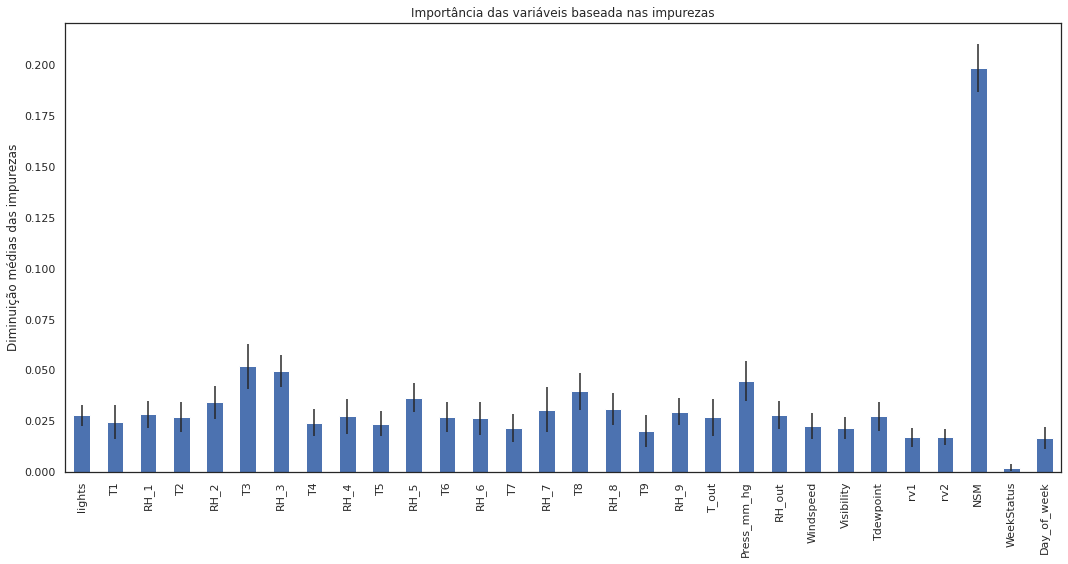

In [40]:
# Seleção de atributos baseado na diminuição média de impureza
forest = RandomForestRegressor().fit(train_X, train_y)
std = np.std([estimator.feature_importances_ for estimator in forest.estimators_], axis=0)
forest_importances = pd.Series(forest.feature_importances_, index=train_X.columns)

sns.set_theme(style="white")
fig, ax = plt.subplots(figsize= (15,8))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Importância das variáveis baseada nas impurezas")
ax.set_ylabel("Diminuição médias das impurezas")
fig.tight_layout()

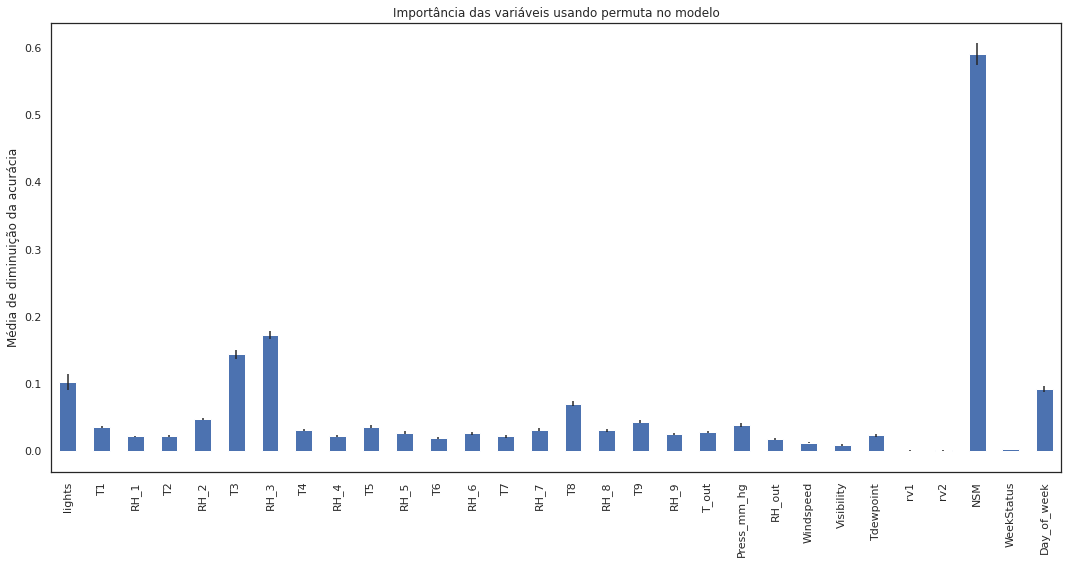

In [43]:
permut = permutation_importance(
    forest, test_X, test_y, n_repeats=10, n_jobs=-1
)
permut_importances = pd.Series(permut.importances_mean, index=test_X.columns)
sns.set_theme(style="white")
fig, ax = plt.subplots(figsize= (15,8))
permut_importances.plot.bar(yerr=permut.importances_std, ax=ax)
ax.set_title("Importância das variáveis usando permuta no modelo")
ax.set_ylabel("Média de diminuição da acurácia")
fig.tight_layout()
plt.show()

In [44]:
# Avaliar VIF apoós retirada das variáveis baseado na importância com random fores e também da multicolinearidade
""" Importante avaliar o modelo em seguida pois algumas ainda continuaram com VIF alto """
X_temp = X_temp.drop(["T1", "T2", "T4", "T5", "T6", "T7", "T9", "RH_1", "RH_2", "RH_4", "RH_4", "RH_5",
"RH_6", "RH_7", "RH_8", "RH_9", "T_out", "RH_out", "WeekStatus", "rv1", "rv2", "Visibility", "Tdewpoint"], axis=1)

num3 = [vif["variaveis"][i] for i in vif.index if vif["VIF"].astype("float64")[i] <= 25]
ind = [i for i in vif.index if vif["VIF"].astype("float64")[i] <= 25]
vif2 = calc_vif(X_temp)
vif2

,variaveis,VIF
0,lights,1.39
1,T3,404.13
2,RH_3,181.85
3,T8,438.43
4,Press_mm_hg,331.96
5,Windspeed,4.23
6,NSM,4.56
7,Day_of_week,3.34
8,Appliances,2.42


In [45]:
# Variáveis selecionadas para treinar os modelos 
vars_final = ['lights', 'T3', 'RH_3', 'T8', 'Press_mm_hg', 'Windspeed', 'NSM','Day_of_week']
train_X = train_X[vars_final]
test_X = test_X[vars_final]
train_X.head()

,lights,T3,RH_3,T8,Press_mm_hg,Windspeed,NSM,Day_of_week
0,3.319446,-1.227217,1.689135,-1.954635,-2.963150,1.220229,0.730515,-1.005141
1,3.319446,-1.227217,1.707606,-1.954635,-2.949683,1.083397,0.754474,-1.005141
2,3.319446,-1.227217,1.751732,-1.954635,-2.936217,0.946565,0.778433,-1.005141
3,4.584478,-1.227217,1.772255,-2.005659,-2.909284,0.672900,0.826351,-1.005141
4,4.584478,-1.227217,1.751732,-2.005659,-2.895818,0.536068,0.850310,-1.005141


In [46]:
# Escolher os modelos
models = [
        ['Lasso: ', Lasso()],
        ['Ridge: ', Ridge()],
        ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
        ['SVR:' , SVR(kernel='rbf')],
        ['RandomForest ',RandomForestRegressor()],
        ['ExtraTreeRegressor :',ExtraTreesRegressor()],
        ['GradientBoostingClassifier: ', GradientBoostingRegressor()] ,
        ['XGBRegressor: ', xgb.XGBRegressor()] ,
        ['MLPRegressor: ', MLPRegressor(  activation='relu', solver='adam',
            learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.01)]
    ]

In [47]:
# Rodar os modelos com setagem inicial
model_data = []
for name, curr_model in models :
    curr_model_data = {}
    curr_model_data["Name"] = name
    curr_model.fit(train_X, train_y)
    curr_model_data["Train_R2_Score"] = r2_score(train_y,curr_model.predict(train_X))
    curr_model_data["Test_R2_Score"] = r2_score(test_y,curr_model.predict(test_X))
    curr_model_data["Test_RMSE_Score"] = np.sqrt(mean_squared_error(test_y,curr_model.predict(test_X)))
    model_data.append(curr_model_data)

In [48]:
# Oberservar os resultados
df = pd.DataFrame(model_data)
df

,Name,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,Lasso:,0.000000,0.000000,1.000000
1,Ridge:,0.100759,0.087650,0.955170
2,KNeighborsRegressor:,0.609232,0.316757,0.826585
3,SVR:,0.215552,0.160878,0.916036
4,RandomForest,0.933557,0.455056,0.738203
5,ExtraTreeRegressor :,1.000000,0.497656,0.708762
6,GradientBoostingClassifier:,0.332463,0.239515,0.872058
7,XGBRegressor:,0.760314,0.356701,0.802059
8,MLPRegressor:,0.386684,0.280208,0.848406


<AxesSubplot:title={'center':'R2 Score Results'}, xlabel='Name'>

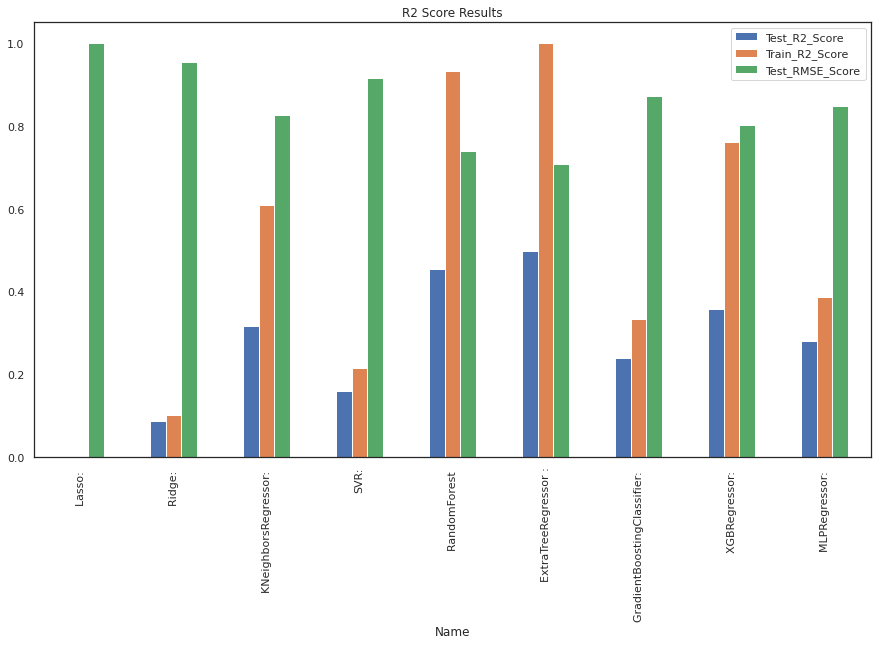

In [49]:
# Por em gráfico para melhor visualização
"""
- Melhor resultado no dataset de test foi Extra Tree Regressor com R2 score de 0.56
- Menor RMSE score no dataset de test foi Extra Tree Regressor 0.66
"""
df.plot(x="Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score'], 
    kind="bar" , title = 'R2 Score Results' , figsize= (15,8))

In [50]:
# Melhorando o modelo de ExtraTreeRegressor
param_grid = [{
              'max_depth': [80, 150, 200,250],
              'n_estimators' : [100,150,200,250],
              'max_features': ["auto", "sqrt", "log2"]
            }]
reg = ExtraTreesRegressor(random_state=40)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ..max_depth=80, max_features=auto, n_estimators=100; total time=   2.9s
[CV] END ..max_depth=80, max_features=auto, n_estimators=100; total time=   3.0s
[CV] END ..max_depth=80, max_features=auto, n_estimators=100; total time=   2.9s
[CV] END ..max_depth=80, max_features=auto, n_estimators=100; total time=   3.0s
[CV] END ..max_depth=80, max_features=auto, n_estimators=100; total time=   3.0s
[CV] END ..max_depth=80, max_features=auto, n_estimators=150; total time=   4.3s
[CV] END ..max_depth=80, max_features=auto, n_estimators=150; total time=   4.4s
[CV] END ..max_depth=80, max_features=auto, n_estimators=150; total time=   4.4s
[CV] END ..max_depth=80, max_features=auto, n_estimators=150; total time=   4.4s
[CV] END ..max_depth=80, max_features=auto, n_estimators=150; total time=   4.7s
[CV] END ..max_depth=80, max_features=auto, n_estimators=200; total time=   5.6s
[CV] END ..max_depth=80, max_features=auto, n_e

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=40), n_jobs=-1,
             param_grid=[{'max_depth': [80, 150, 200, 250],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [100, 150, 200, 250]}],
             scoring='r2', verbose=2)

In [51]:
# Tuned parameter set
grid_search.best_params_

{'max_depth': 80, 'max_features': 'log2', 'n_estimators': 200}

In [52]:
# Best possible parameters for ExtraTreesRegressor
grid_search.best_estimator_

ExtraTreesRegressor(max_depth=80, max_features='log2', n_estimators=200,
                    random_state=40)

In [53]:
# R2 score on training set with tuned parameters
""" Overfitting """
grid_search.best_estimator_.score(train_X,train_y)

1.0

In [54]:
# R2 score on test set with tuned parameters
grid_search.best_estimator_.score(test_X,test_y)

0.5001090505189194

In [55]:
# RMSE score on test set with tuned parameters

np.sqrt(mean_squared_error(test_y, grid_search.best_estimator_.predict(test_X)))

0.7070296666202067

In [56]:
# Get sorted list of features in order of importance
feature_indices = np.argsort(grid_search.best_estimator_.feature_importances_)

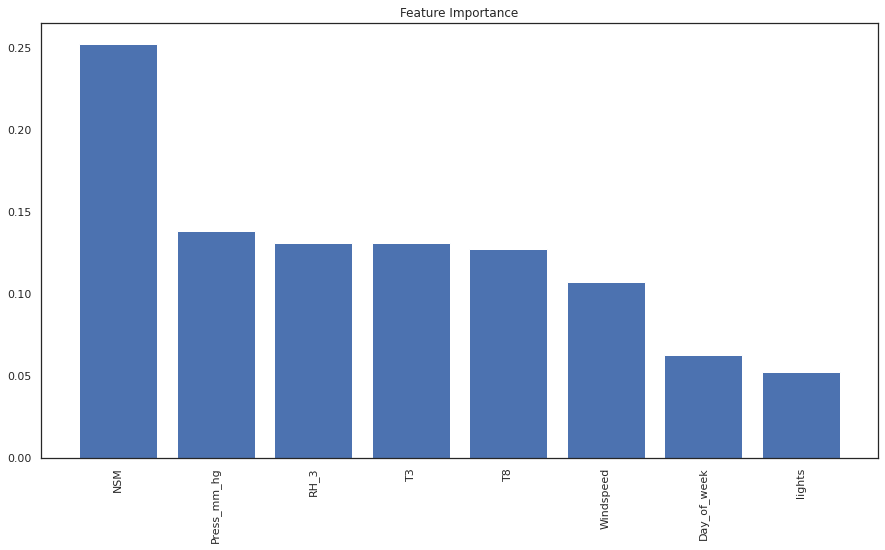

In [57]:
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
names = [train_X.columns[i] for i in indices]
# Create plot
plt.figure(figsize=(15,8))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(train_X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(train_X.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [58]:
# Get top 5 most important feature 
names[0:5]

['NSM', 'Press_mm_hg', 'RH_3', 'T3', 'T8']

In [59]:
# Get 5 least important feature 
names[-5:]

['T3', 'T8', 'Windspeed', 'Day_of_week', 'lights']

In [60]:
# Reduce test & training set to 5 feature set
train_important_feature = train_X[names[0:5]]
test_important_feature = test_X[names[0:5]]

In [61]:
# Clone the Gridsearch model with his parameter and fit on reduced dataset

from sklearn.base import clone
cloned_model = clone(grid_search.best_estimator_)
cloned_model.fit(train_important_feature , train_y)

ExtraTreesRegressor(max_depth=80, max_features='log2', n_estimators=200,
                    random_state=40)

In [62]:
# Reduced dataset scores 

print('Training set R2 Score - ', r2_score(train_y,cloned_model.predict(train_important_feature)))
print('Testing set R2 Score - ', r2_score(test_y,cloned_model.predict(test_important_feature)))
print('Testing set RMSE Score - ', np.sqrt(mean_squared_error(test_y, cloned_model.predict(test_important_feature))))

Training set R2 Score -  0.9999998818665776
Testing set R2 Score -  0.513526537953867
Testing set RMSE Score -  0.6974764956943946
